In [1]:
%matplotlib inline

In [30]:
import h5py
import numpy as np

with h5py.File("data/len2000-var1-trj.h5", "r") as f:
    embedding_high = f["layer3"][...]
    embedding_high = np.array(embedding_high)

labels = []
with open("data/len2000-var1-trj.label", "r") as f:
    for label in f:
        labels.append(int(label))  

In [31]:
from sklearn import manifold
from time import time
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

perplexity = 50.0
tsne = manifold.TSNE(perplexity=perplexity, init='pca', verbose=1)
t0 = time()
embedding_low = tsne.fit_transform(embedding_high)
t1 = time()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.057s...
[t-SNE] Computed neighbors for 2000 samples in 4.345s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 3.880835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.322983
[t-SNE] KL divergence after 1000 iterations: 0.996961


In [107]:
'''Apply KMeans to the 2D vectors.'''
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

# model = KMeans()
# visulizer = KElbowVisualizer(model, k=(10, 40), timings=False)
# visulizer.fit(embedding_low)
# visulizer.show()
kmeans = KMeans(n_clusters=30, verbose=0)
colors = kmeans.fit_predict(embedding_low)


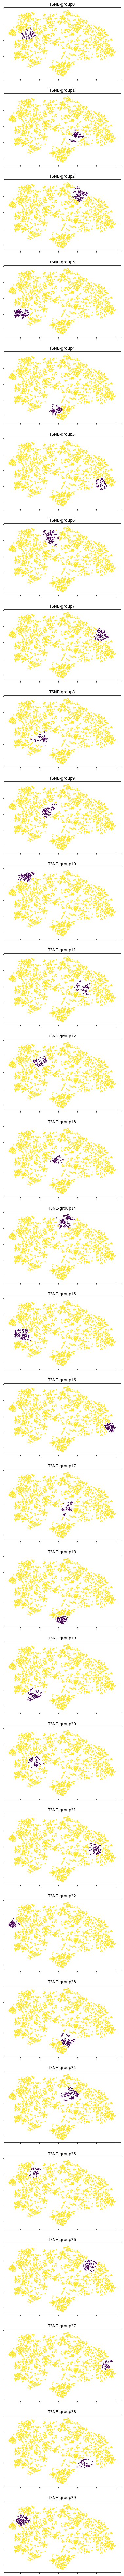

In [108]:
'''Visualize the clustering results on 2D plane.'''
length = len(set(labels))
variance = len(labels) // length
# fig, ax = plt.subplots()
# ax.scatter(embedding_low[:, 0], embedding_low[:, 1], c=[0 if c == 18 or c == 22 else 1 for l, c in zip(labels, colors)], s=5.0)
# #ax.scatter(embedding_low[:, 0], embedding_low[:, 1], c=colors, s=5.0)
# ax.set_title("TSNE-len%d-diff%d-perp%.2f (%.2g sec)" % (length, variance, perplexity, t1-t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
# plt.show()

fig = plt.figure(figsize=(6.4, 4.8*30))
for i in range(30):
    ax = fig.add_subplot(30, 1, i + 1)
    ax.scatter(embedding_low[:, 0], embedding_low[:, 1], c=[0 if c == i else 1 for l, c in zip(labels, colors)], s=5.0)
    ax.set_title("TSNE-group%d" % i )
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
plt.show()

In [112]:
'''Visualize the clustering results on map.'''
import folium
import webbrowser

group_id = {22}
trips_id = [[l for l, c in zip(labels, colors) if c == g] for g in group_id]
trips = []
# print("cluster size = %d %d" % (len(trips_id[0]), len(trips_id[1])))

with h5py.File("data/trips.h5", "r") as f:
    for i, t in enumerate(trips_id):
        trips.append([])
        for id in t:
            trip = np.array(f["/trips/" + str(id)][...])
            trips[i].append(np.column_stack((trip[:, 1], trip[:, 0])))
# trips[0]        
colors_ = ["green", "blue", "yellow"]
m = folium.Map(location=[41.141691, -8.595513], zoom_start=13)
for i, x in enumerate(trips):
    for trip in x:
        folium.PolyLine(trip.tolist(), weight=3, color=colors_[i]).add_to(m)
m.save("data/trips_vis.html")
webbrowser.open("data/trips_vis.html")



True